# Using Genetic Algorithms to Form Optimal Groups

We have all been in that situation. You have to do a group project in a class, and the lecturer assigns the groups randomly. You find yourself in a group with people you don’t know and end up doing all the work by yourself. We want to change that and want you to implement an Genetic Algorithm that optimizes groups.


## Task 1:


You have to implement the initial population, crossover, mutation, and fitness function. We divided it into smaller subtasks for you and implemented some of the functions for you. If you want to do your own implementation, feel free to ignore our hints and functions.

Your initial population consists of 50 group distributions, where 100 students are assigned to 20 groups. Each student has a Student ID, a name, their spoken language, their 2 Majors (we assume everyone is doing their Masters), their ambition in the course, their preferred meeting place, their personality type, their gender, a friend that they want to be in a group with, and their preferred meeting day.

To get you even more involved with the task, we want every member of your group to add their own person into the data. To do so, you simply have to execute the Jupyter Notebook named "Dataset_Input.ipynb". We are using the Myers-Briggs personality, which may not be the most scientific, but it for sure is entertaining. If you don’t know your type, you can take the test here (approx. 10 minutes) https://www.16personalities.com/free-personality-test. 

Run this cell to load the packages:

In [141]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets
import IPython
from Generator import DataGenerator
from typing import List

Execute this cell to create the dataset:

In [142]:
generator = DataGenerator()

#df, type_ = generator.create_basic()

df, type_ = generator.create_full()

df.to_csv("dataset_" + type_ + ".csv", encoding="utf-8-sig", index=False)

Please provide the number of participants: 
Please provide an integer value!

Please provide the number of participants: 
Please provide an integer value!

Please provide the number of participants: 
Please provide an integer value!

Please provide the number of participants: 100


Hyperparameters:

In [187]:
students: pd.DataFrame = pd.read_csv("dataset_full.csv")
student_ids: List[int] = students.ID.tolist()

# hyperparameters
num_individuals: int = 100
groupsize: int = 5
# between 0 and 1
mutation_rate: float = 0.05

students

,ID,Name,Gender,Preferred language,Majors,Level of ambition,Preferred meeting place,Personality type,Best friend,Preferred day
0,1,Florian Schäfer,Male,Any,"('NS', 'NI')",Low,In person,INFP,Marco Richter,Thursday
1,2,Christin Schmidt,Female,Any,"('NS', 'PHIL')",Very high,In person,ESFJ,Sandra Bar,Thursday
2,3,Ralf Frei,Male,German,"('AI', 'NI')",Medium,In person,ESFJ,Leonie Meyer,Tuesday
3,4,Jessika Bergmann,Female,Any,"('NS', 'NI')",Very high,In person,INTJ,Dirk Gersten,Friday
4,5,Kathrin Frueh,Female,Any,"('NI', 'NS')",Low,Online,ENFJ,Lisa Kruger,Tuesday
...,...,...,...,...,...,...,...,...,...,...
95,96,Thorsten Baier,Male,Any,"('CL', 'NS')",Very high,In person,ENTP,Torsten Kastner,Friday
96,97,Marcel Lang,Male,Any,"('NI', 'CL')",High,In person,ESFJ,Maik Wulf,Thursday
97,98,Sabrina Brandt,Female,Any,"('AI', 'NS')",Very high,Online,INTJ,Jürgen Rothstein,Wednesday
98,99,Melanie Hirsch,Female,English,"('NS', 'NI')",Very high,In person,ISFP,Martin Pfeifer,Wednesday


We create one random individual:

In [188]:
def create_random_individual(student_ids: List[int]) -> List[int]:
    #You don't need to do anything here.

    individual = student_ids.copy()
    random.shuffle(individual)

    return individual

print(create_random_individual(student_ids))

[28, 47, 65, 80, 6, 85, 23, 4, 29, 39, 48, 2, 60, 53, 46, 84, 81, 68, 90, 12, 98, 5, 36, 26, 96, 44, 37, 38, 17, 95, 67, 88, 3, 83, 15, 77, 86, 22, 19, 100, 18, 42, 10, 34, 14, 50, 72, 99, 27, 30, 8, 1, 89, 25, 21, 70, 43, 61, 33, 58, 71, 94, 75, 62, 40, 16, 92, 31, 35, 45, 66, 82, 13, 49, 97, 93, 7, 32, 20, 56, 52, 74, 91, 76, 73, 63, 87, 24, 59, 55, 78, 54, 41, 51, 69, 64, 79, 11, 9, 57]




Create the initial population of 50 (=num_individuals) individuals:


In [189]:
def create_initial_population(student_ids: List[int], num_individuals: int) -> np.ndarray:
    
    #should return a numpy array of the whole population
    
    return np.array([create_random_individual(student_ids) for _ in range(num_individuals)])

We need a fitness function that computes how good the group distribution is. You have to take into consideration that we have many parameters that are not equally important and should therefore be differently weighted. We already coded some of the specific evaluation functions for the parameters for you. You have to implement the remaining evaluation functions. Think about what is desirable to have in a group and how you can calculate it. For example, you might have to change the data type of a parameter to make meaningful calculatons.

At the end, you have to weigh all evaluation functions in one fitness function. 

In [146]:
def evaluate_language(group: pd.DataFrame) -> float:
    """
    Idea: A goo combination is when people within a group can understand each other. Once there are people that can only 
    speak either German or English, this is not the case anymore.
    Returns 0 if there are clashing languages, 5 otherwise 
    """
    # Extract the preferred languages of the group members
    language_occurences = group['Preferred language'].value_counts()
    
    # If both English and German are in the preferred language, the group combination is bad
    if 'English' in language_occurences.keys() and 'German' in language_occurences.keys():
        return 0
    else:
        return 5

In [147]:

def evaluate_majors(group: pd.DataFrame) -> float:
    """
    Idea: There are 7 possible majors in total - if everyone is doing the same majors they have similar interests which 
    could be beneficial in group work. Arguably, it could also be benefitial to have people with various interests which 
    is not reflected in this solution.
    """
    # First, create a list of all majors (the strings in the df first have to be preprocessed to extract the majors from it)
    all_majors = []
    remove_chars = ')(\' '
    for majors in group['Majors'].tolist():
        for char in remove_chars:
            majors = majors.replace(char, '')
        all_majors.append(majors.split(','))
    
    # Extract the majors that occur within the group
    reshaped_all_majors = np.unique(np.array(all_majors).reshape((-1)))
    
    return 2. / len(reshaped_all_majors) # Highest fitness score if all members have the same majors


In [148]:

def evaluate_ambition(group: pd.DataFrame) -> float:
    """
    Idea: The higher the overall ambition within a group, the better since then the project gets done
    Returns the sum over the mappings from low ambition, or 0, to high ambition, or 4.
    """
    
    # Arguably, it could also be nice to have people with similar ambition so noone gets disappointed. 
    # However, a group project with many people without ambition could fail as well.
    
    # Map ambitions to ineger from 0-4
    ambitions = ['Very low', 'Low', 'Medium', 'High', 'Very high']
    ambition_mappings = np.arange(5)
    for ambition, mapping in zip(ambitions, ambition_mappings):
        group = group.replace(ambition, mapping)
    
    # Return the sum over the ambitions normalized with the maximally possible ambition level (16) but multiply 
    # with 5 as a weighting factor since ambition could be important
    return group['Level of ambition'].sum() / 16. * 5


In [149]:

def evaluate_meeting_place(group: pd.DataFrame) -> float:
    #You don't need to code anything in here.
    #This is an example evaluation function.
    
    # number of groupmembers for each preferred meeting place
    meeting_place = group['Preferred meeting place'].value_counts()

    # if all prefer the same meeting place return 5, else 0
    if meeting_place[0] == groupsize:
        return 5

    return 0

In [150]:
def evaluate_gender(group: pd.DataFrame) -> float:
    """
    Idea: the genders of group members is irrelevant to the sucess of group work
    """
    return 1

In [151]:
def evaluate_friends(group: pd.DataFrame) -> float:
    """
    Idea: It is good when friends are in the same group since they already know each other which could ease communication.
    """
    
    group_members = np.array(group['Name'])
    group_member_friends = np.array(group['Best friend'])
    
    number_friends = np.sum(np.array([1 for group_member in group_members if group_member in group_member_friends]))
    
    return number_friends

In [152]:
def evaluate_personality(group: pd.DataFrame) -> float:
    #You dont need to change anything in here 

    #information about compatible personality types is taken from
    # Montequín, Vicente Rodríguez, et al. "Using Myers-Briggs type indicator (MBTI) as a tool for setting up student teams for information technology projects." Journal of Information Technology and Application in Education 1.1 (2012): 28-34.

    #count existing personality types in each group
    personalities = group['Personality type']
    types = personalities.value_counts()

    #fitness function starts with 0 and gets better
    # with every good group member
    fitness = 0

    #its good if there is a group leader like an ISTJ or an ESTJ, but only one
    try:
        if (types['ISTJ'] + types['ESTJ'] == 1):
            fitness+=5
        elif (types['ISTJ'] + types['ESTJ'] >= 2):
            fitness-=5
    except KeyError:
        pass

    #compare compatibility of group members
    for i, personality_a in enumerate(personalities.tolist()):
        for j, personality_b in enumerate(personalities.tolist()):
            # skip same group member and members already compared
            if i <= j:
                continue

            # increase fitness if
            if (personality_a[1] != personality_b[1]) ^ (personality_a[2] != personality_b[2]):
                if (personality_a[0] != personality_b[0]) or (personality_a[3] != personality_b[3]):
                    fitness+=1

    return fitness

In [153]:
def evaluate_meeting_day(group: pd.DataFrame) -> float:
    """
    Idea: It is good if many people have the same preferred meeting day.
    Returns the highest number of agreement on the meeting day.
    """
    
    return group['Preferred day'].value_counts()[0] # Automatically sorts in descending order, so simply take the first one

And now put everything together.
The function is almost done, but remember to add the weights.

In case you want to add hard constraints, feel free to do that in this function.



In [154]:
def evaluate_fitness(individual: np.ndarray, students: pd.DataFrame):
    # split individual into student groups of the groupsize
    groups = np.array_split(individual, (len(individual)/groupsize))

    # iterate over groups and calculate scores for the different parameters
    scores = []
    for group_ids in groups:
        # get full data for students in this group from pd dataframe
        group = students.loc[students['ID'].isin(group_ids)]

        # get individual scores for parameters
        language_score = evaluate_language(group)
        major_score = evaluate_majors(group)
        ambition_score = evaluate_ambition(group)
        place_score = evaluate_meeting_place(group)
        gender_score = evaluate_gender(group)
        friend_score = evaluate_friends(group)
        personality_score = evaluate_personality(group)
        day_score = evaluate_meeting_day(group)

        # formula for adding and weighting different scores
        scores.append(language_score+major_score+ambition_score+place_score+gender_score+friend_score+personality_score+day_score)

    #Convert to series to calculate mean more easily
    return pd.Series(scores).mean()
    

In [155]:
evaluate_fitness(create_random_individual(student_ids), students)

15.557708333333327

Now, you have to code a crossover function, which takes 2 individuals based on their fitness function and produces a child from them. Use the tournament selection for parent selection.
For the crossover, we want you to use the uniform crossover function with random templates. 

In [214]:
def tournament_selection(population: np.ndarray, tournament_size: int) -> List[np.ndarray]:
    
    # Get tournament_size-many random individuals from the population
    np.random.shuffle(population)
    tournament_contestants = population[:tournament_size]

    # Get the fitnesses of the contestants
    population_fitnesses = np.array([evaluate_fitness(individual, students) for individual in tournament_contestants])
    orig_population_fitnesses = population_fitnesses.copy()
    
    # Perform the tournament selection
    while True:
        
        # Neglect last element of population if uneven number to continue the tournament
        population_fitnesses = population_fitnesses.reshape(-1, 2) if len(population_fitnesses) % 2 == 0 else population_fitnesses[:-1].reshape(-1, 2)
        
        # Cannot be reshaped correctly afterwards or two next parents reached
        if not len(population_fitnesses.flat) > 2:
            break
        
        population_fitnesses = np.max(population_fitnesses, axis=1)
    
    # Now return those parents that won the tournament
    parent1 = tournament_contestants[orig_population_fitnesses == population_fitnesses[0,0]][0]
    parent2 = tournament_contestants[orig_population_fitnesses == population_fitnesses[0,1]][0]
    return np.array([parent1, parent2])

Use a boolean template in the length of the individual, this can be hardcoded or generated randomly every time to add more variance. On the places where the template is true use the genes from parent1, then take all the genes from parent2 that are not used and add them to the empty places in the child in the same order as they appear on parent2

In [215]:
def uniform_order_crossover(parent1: np.ndarray, parent2: np.ndarray, template: np.ndarray) -> np.ndarray:
    
    child = np.zeros_like(parent1)
    
    # Assign the values at the fixed positions given through the template
    child[template] = parent1[template]
    
    # Exchange the leftover spaces in child (indicated by zero) with the leftover people in the order of the other parent
    child[child == 0] = [x for x in parent2 if x in np.delete(parent1, np.where(child))]
    
    return np.array(child)

The last thing you need is the mutation function. It should take the individual produced by the crossover function and mutate it with a chance of for example 5%. A mutation switches the assigned groups of 2 people. 

In [216]:
def mutation(individual: np.ndarray, mutation_rate: float) -> np.ndarray:
    
    # With the probability of the mutation rate, get two people in individual and swap them
    if random.random() < mutation_rate:
        
        # Get into two different groups and then select a random position within those groups respectively
        rand_group = random.sample(range(0, len(individual)-1, groupsize), 2)
        i1, i2 = rand_group[0] + random.randint(0, groupsize-1), rand_group[1] + random.randint(0, groupsize-1)
        
        # Swap the individuals
        individual[i1], individual[i2] = individual[i2], individual[i1]
    
    return individual

You can now execute the code below and see if everything is working.

In [217]:
def get_n_worst_individuals(population, population_fitnesses, n):
    """
    Returns the indices of the n worst individuals
    """
    orig_population_fitnesses = population_fitnesses.copy()
    
    # Get the indices of the n worst individuals of the population
    population_fitnesses.sort()
    idx_remove = []
    for fitness in population_fitnesses[:n]:
        idx_remove.append(np.where(orig_population_fitnesses == fitness)[0][0]) # index with 0 to only take one if multiple individuals have the same fitness
    
    return np.array(idx_remove).reshape(n)

In [220]:
#episodes is the number of episodes after the algorithm stops
#num_replace is the number of unfit individuals that will be replaced
def genetic_algorithm(episodes: int, num_replace: int) -> np.ndarray:
    """
    Performs the genetic algorithm: In each iteration, it replaces the num_replace-many worst individuals with
    newly created individuals based on the winners of the tournament selection.
    """
    
    # Create an initial population of 50 individuals
    population = create_initial_population(list(students['ID']), 50)
    
    mean_fitness_progress = []
    
    for episode in range(episodes): # episode = generation
        
        counter = 0
        
        # Calculate the fitnesses of the individuals in the population
        fitnesses = np.array([evaluate_fitness(individual, students) for individual in population])
        
        # Remove the num_replace-many worst individuals from the population and the determined fitness scores
        idx_2be_removed = get_n_worst_individuals(population, fitnesses, num_replace)
        population = np.delete(population, idx_2be_removed, axis=0)
        fitnesses = np.delete(fitnesses, idx_2be_removed, axis=0)
        
        # Refill the population until it meets the original size with one new child at a time
        while counter < num_replace:
            
            # Select parents through tournament selection
            parents = tournament_selection(population, 16)
            
            # Determine child via crossover
            child = uniform_order_crossover(parents[0], parents[1], template=np.random.choice(a=[True, False], size=(len(parents[0]))))
            
            # Mutate the child with a probabilit of the mutation rate 0.05 and append it to the population and its fitness
            # to the fitnesses
            child = mutation(child, 0.05)
            population = np.append(population, [list(child)], axis=0)
            fitnesses = np.append(fitnesses, evaluate_fitness(child, students))
            
            counter += 1
        
        # Evaluate mean fitness of the population and print information for progress tracking
        mean_fitness = np.mean(fitnesses)
        mean_fitness_progress.append(mean_fitness)
        print('Episode: ', episode, '- Mean fitness score: ', mean_fitness)
            
    # Plot the mean fitnesses in the end to make progress visible
    plt.plot(np.arange(episodes), mean_fitness_progress, color='orange')
    plt.show()

Episode:  0 - Mean fitness score:  15.976041666666664
Episode:  1 - Mean fitness score:  16.112174999999993
Episode:  2 - Mean fitness score:  16.14100833333333
Episode:  3 - Mean fitness score:  16.244974999999997
Episode:  4 - Mean fitness score:  16.279174999999995
Episode:  5 - Mean fitness score:  16.274008333333327
Episode:  6 - Mean fitness score:  16.32930833333333
Episode:  7 - Mean fitness score:  16.371541666666662
Episode:  8 - Mean fitness score:  16.415174999999998
Episode:  9 - Mean fitness score:  16.406074999999998
Episode:  10 - Mean fitness score:  16.46590833333333
Episode:  11 - Mean fitness score:  16.53010833333333
Episode:  12 - Mean fitness score:  16.551074999999997
Episode:  13 - Mean fitness score:  16.605374999999995
Episode:  14 - Mean fitness score:  16.634608333333333
Episode:  15 - Mean fitness score:  16.60630833333333
Episode:  16 - Mean fitness score:  16.596941666666662
Episode:  17 - Mean fitness score:  16.65410833333333
Episode:  18 - Mean fitnes

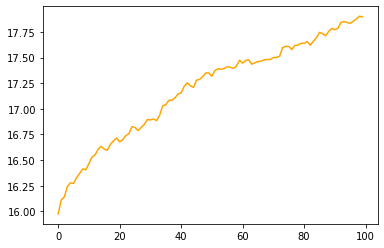

In [221]:
population = genetic_algorithm(100,2)

### Let's find your group or the one of a friend

In [222]:
def get_groups_from_individual(individual: np.ndarray) -> List[np.ndarray]:
    """ Returns a Python List of all Groups in an individual(as numpy ndarrays) """
    groups = pd.DataFrame()
    for i in individual:
        groups = pd.concat([groups, students.loc[students['ID'] == i]])

    groups = groups.reset_index(drop=True)
    nested_groups_list = []
    for n,j in enumerate(range(0, len(groups), groupsize)):
        nested_groups_list.append(pd.DataFrame(groups[j:j+groupsize]))
    return nested_groups_list

def get_groups_by_person_fullname(fullname: str, individual: np.ndarray) -> List[np.ndarray]:
    """ Returns all Groups that got a Person with $fullname$ in given $individual$"""
    nested_groups_list = get_groups_from_individual(individual)

    groups_with_person = []
    for group in nested_groups_list:
        if fullname in group["Name"].values:
            groups_with_person.append(group)
    return groups_with_person

def get_group_by_person_ID(ID: int, individual: np.ndarray) -> np.ndarray:
    """ Returns Group that has Person with given $ID$ in given $individual$"""
    nested_groups_list = get_groups_from_individual(individual)
    groups_with_person = []
    for group in nested_groups_list:
        if ID in group["ID"].values:
            return group
    return None


#### Find your group by your Fullname

In [223]:
######### ATTENTION ##########
# Define your individual here!!! At the moment it will take a random individual! Pick for example the fittest individual.
individual = create_random_individual(student_ids)

# User Input for the Full Name - Please be accurate!
fullname = str(input("Please the Full-Name you want to look up: "))
# Get the group by your Full Name - If there are multiple Persons with your name you will get all of them
my_group = get_groups_by_person_fullname(fullname, individual)
# Plotting the first group found
if my_group:
    print(my_group)
else:
    print("Didn't find the requested Person with given Fullname")

Please the Full-Name you want to look up: Florian Schäfer
[     ID               Name  Gender Preferred language          Majors  \
25   73       Dirk Hertzog    Male                Any    ('CP', 'AI')   
26   80  Jennifer Reinhard  Female                Any    ('AI', 'CL')   
27  100  Diana Ehrlichmann  Female                Any    ('CP', 'CL')   
28    2   Christin Schmidt  Female                Any  ('NS', 'PHIL')   
29    1    Florian Schäfer    Male                Any    ('NS', 'NI')   

   Level of ambition Preferred meeting place Personality type  \
25            Medium               In person             ESFP   
26            Medium                  Online             ENTJ   
27            Medium               In person             ESFJ   
28         Very high               In person             ESFJ   
29               Low               In person             INFP   

         Best friend Preferred day  
25  Sophia Ebersbach        Friday  
26       Marko Pfaff      Thursday  


#### Find your group by your ID

In [224]:
# Find your group by your ID
my_group = get_group_by_person_ID(101, individual)
# Plotting the group, if one found with given ID
if my_group is not None:
    print(my_group)
else:
    print("Didn't find the requested Person with given ID")

Didn't find the requested Person with given ID


## Task 2

Play around with the different values like initial population size, mutation rate, fitness function, and number of students and observe when it works the best. Write your insights down here.